In [39]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [49]:
import statsmodels.api as sm

In [2]:
data=pd.read_csv('delivery_time.csv')

In [3]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [5]:
data_new = data.rename({'Delivery Time':'Delivery_time','Sorting Time':'Sorting_time'},axis=1)
data_new

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


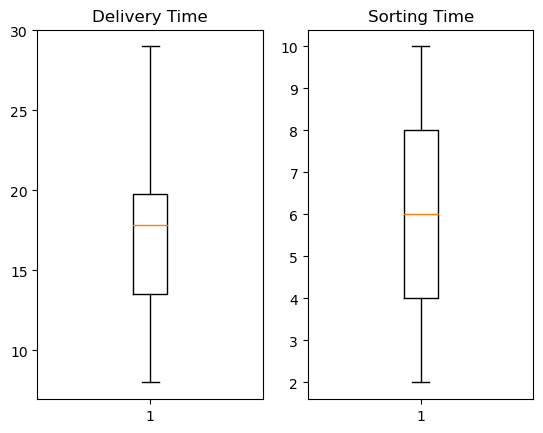

In [42]:
plt.subplot(121)
plt.boxplot(data_new['Delivery_time'])
plt.title('Delivery Time')
plt.subplot(122)
plt.boxplot(data_new['Sorting_time'])
plt.title('Sorting Time')
plt.show()

In [7]:
data_new.corr()

,Delivery_time,Sorting_time
Delivery_time,1.000000,0.825997
Sorting_time,0.825997,1.000000


Text(0.5, 1.0, 'Delivery_Time Vs Sorting_Time')

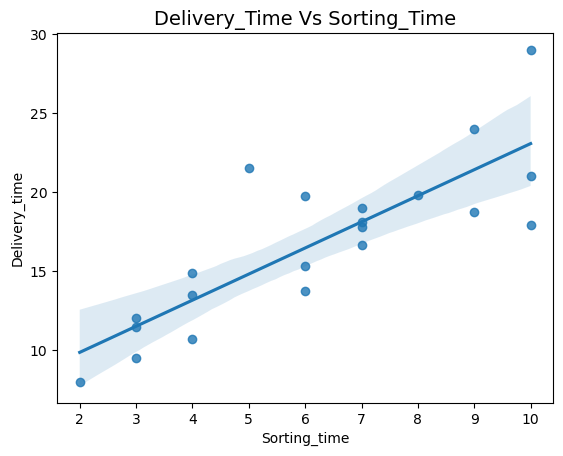

In [44]:
sns.regplot(x=data_new['Sorting_time'],y=data_new['Delivery_time'])
plt.title('Delivery_Time Vs Sorting_Time', fontsize = 14)

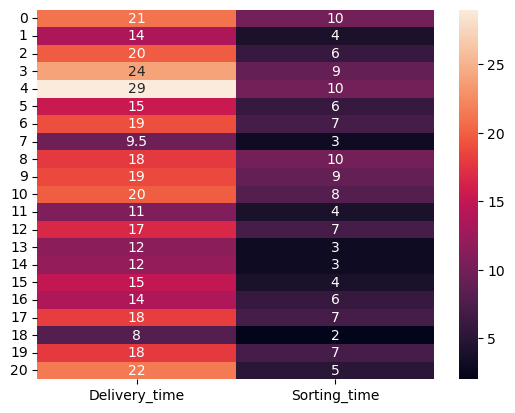

In [43]:
sns.heatmap(data= data_new, annot=True)
plt.show()

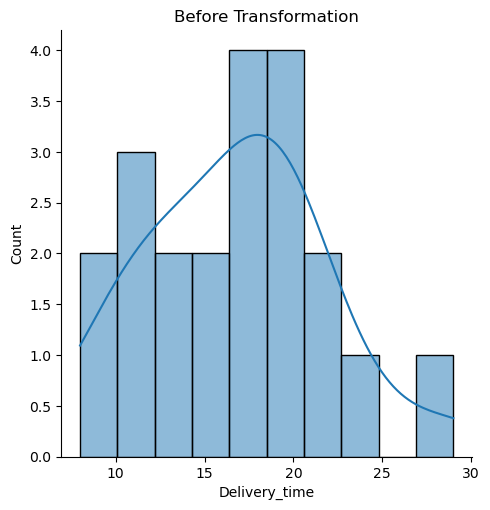

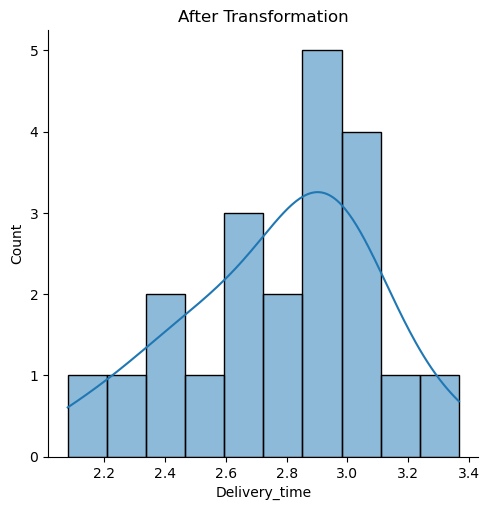

In [45]:
sns.displot(data_new['Delivery_time'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(data_new['Delivery_time']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

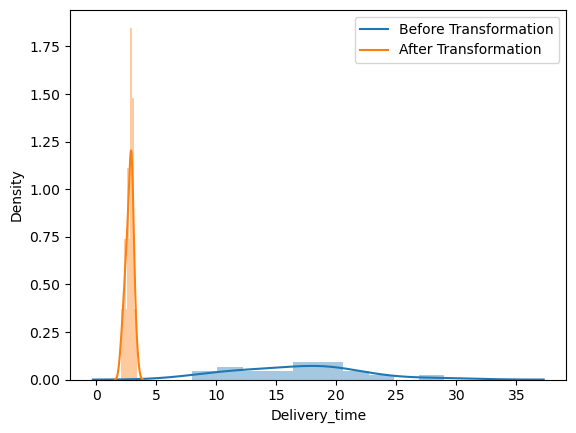

In [46]:
labels = ['Before Transformation','After Transformation']
sns.distplot(data_new['Delivery_time'], bins = 10, kde = True)
sns.distplot(np.log(data_new['Delivery_time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

Text(0.5, 1.0, 'No transformation')

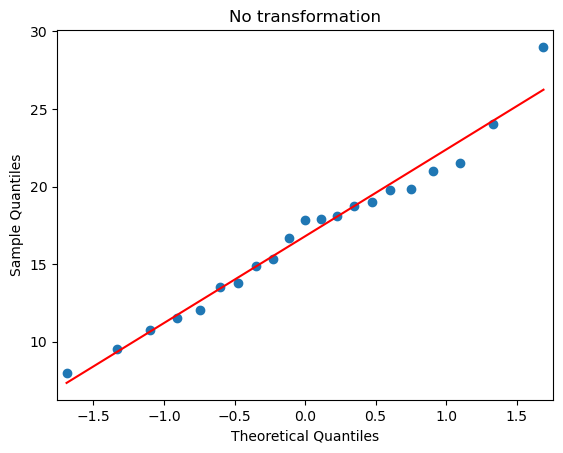

In [52]:
sm.qqplot(data_new['Delivery_time'], line = 'r')
plt.title('No transformation')


Text(0.5, 1.0, 'Log transformation')

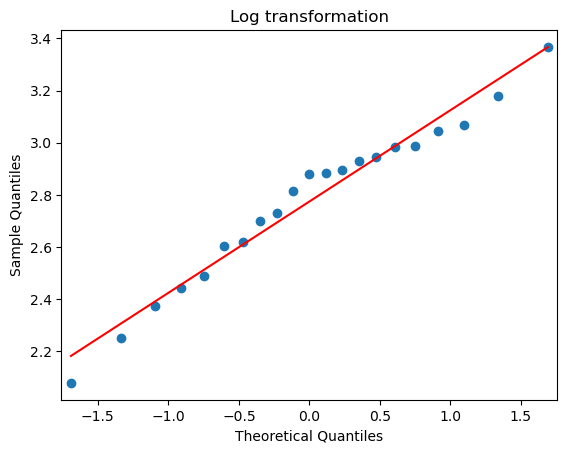

In [53]:
sm.qqplot(np.log(data_new['Delivery_time']), line='r')
plt.title('Log transformation')


Text(0.5, 1.0, 'Square root transformation')

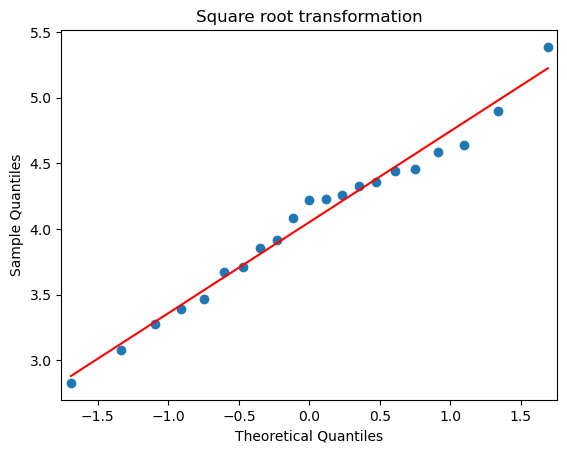

In [55]:
sm.qqplot(np.sqrt(data_new['Delivery_time']), line = 'r')
plt.title('Square root transformation')

Text(0.5, 1.0, 'Cube root transformation')

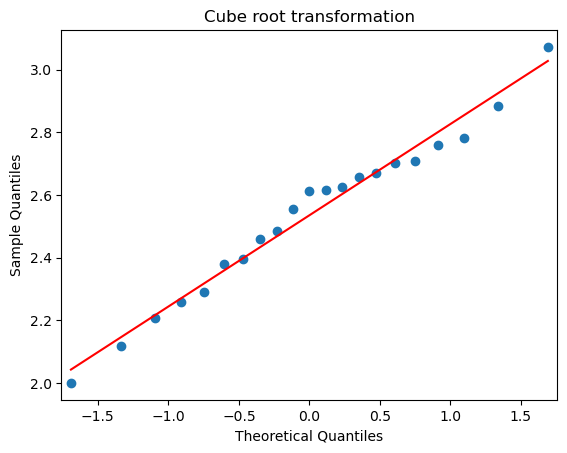

In [56]:
sm.qqplot(np.cbrt(data_new['Delivery_time']), line = 'r')
plt.title('Cube root transformation')

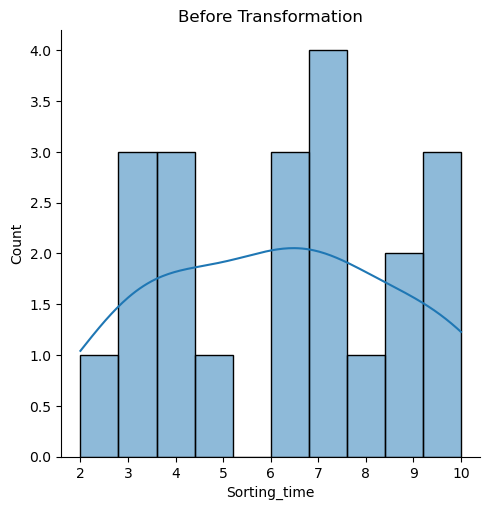

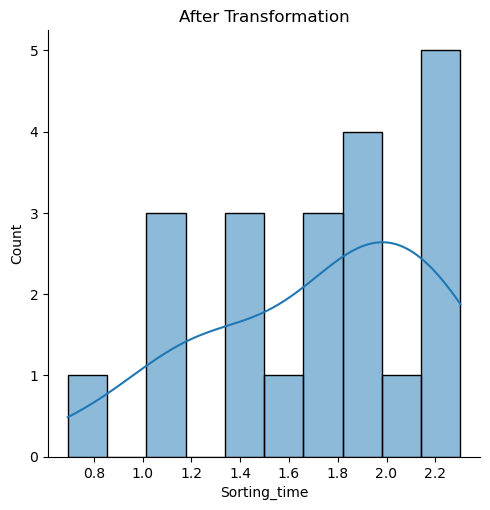

In [58]:
sns.displot(data_new['Sorting_time'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(data_new['Sorting_time']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

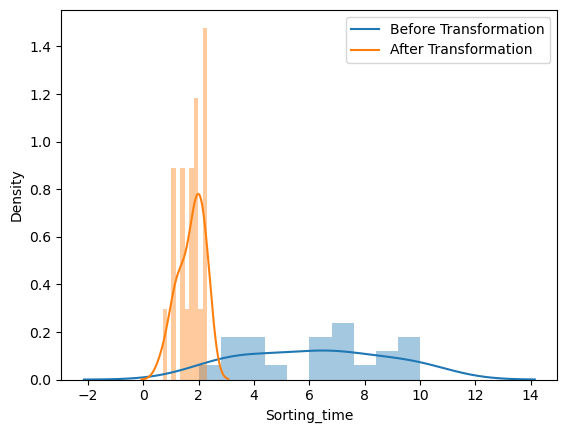

In [59]:
labels = ['Before Transformation','After Transformation']
sns.distplot(data_new['Sorting_time'], bins = 10, kde = True)
sns.distplot(np.log(data_new['Sorting_time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()


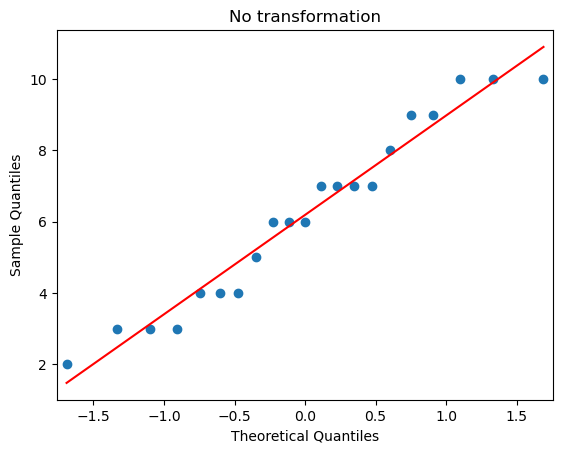

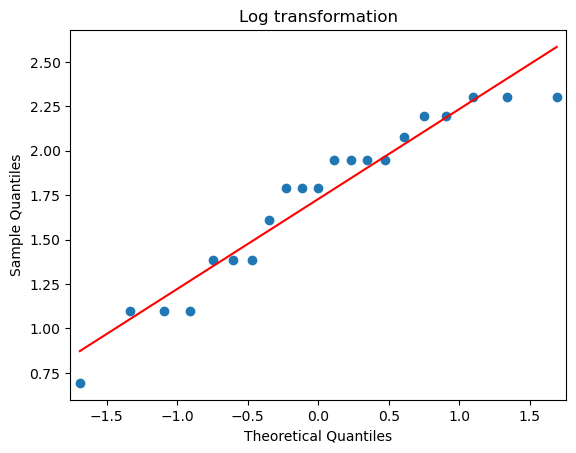

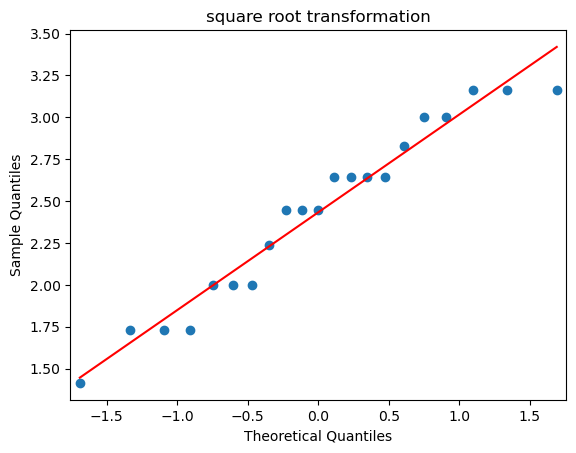

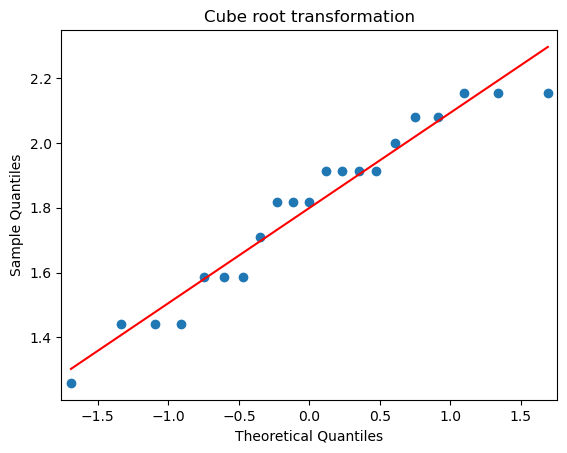

In [60]:
sm.qqplot(data_new['Sorting_time'], line = 'r')
plt.title('No transformation')
sm.qqplot(np.log(data_new['Sorting_time']), line = 'r')
plt.title('Log transformation')
sm.qqplot(np.sqrt(data_new['Sorting_time']), line = 'r')
plt.title('square root transformation')
sm.qqplot(np.cbrt(data_new['Sorting_time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

In [61]:
linear_model = smf.ols('Delivery_time~Sorting_time', data = data_new).fit()

In [62]:
print('R-squared     :',linear_model.rsquared.round(3)) #Overall Contribution of Predictors
print('Adj.R-squared :',linear_model.rsquared_adj.round(3)) #Overall Contribution of Predictors
print('AIC Value     :',linear_model.aic.round(3))
print('BIC Value     :',linear_model.bic.round(3))

R-squared     : 0.682
Adj.R-squared : 0.666
AIC Value     : 106.714
BIC Value     : 108.803


In [ ]:
#Cube Root transformation

In [63]:
linear_model1 = smf.ols('np.sqrt(Delivery_time)~np.sqrt(Sorting_time)', data =data_new).fit()

In [64]:
linear_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.sqrt(Delivery_time)   R-squared:                       0.729
Model:                                OLS   Adj. R-squared:                  0.715
Method:                     Least Squares   F-statistic:                     51.16
Date:                    Fri, 01 Mar 2024   Prob (F-statistic):           8.48e-07
Time:                            10:58:47   Log-Likelihood:                -5.7320
No. Observations:                      21   AIC:                             15.46
Df Residuals:                          19   BIC:                             17.55
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(Sorting_time)     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#log transformation

In [66]:
linear_model2 = smf.ols('np.log(Delivery_time)~np.log(Sorting_time)', data = data_new).fit()

In [67]:
linear_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Fri, 01 Mar 2024   Prob (F-statistic):           1.60e-07
Time:                           11:01:22   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(Sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

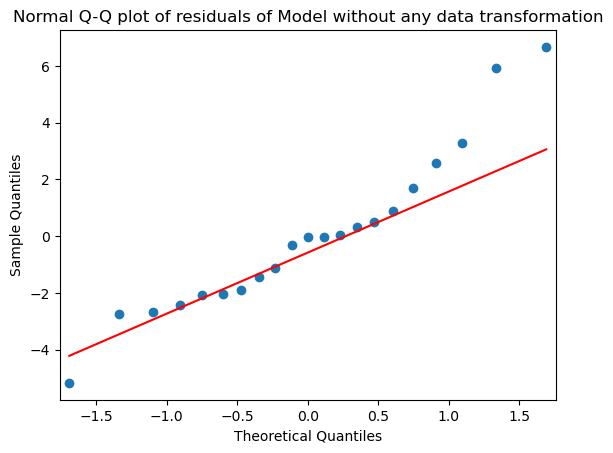

In [68]:
sm.qqplot(linear_model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

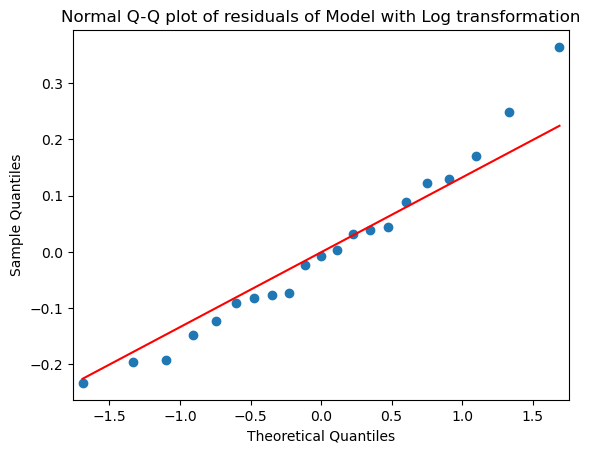

In [69]:
sm.qqplot(linear_model2.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model with Log transformation')
plt.show()

Both The Model have slightly different plots

The first model is right skewed and doesn't follow normal distribution

The second model after log-transformation follows normal distributon with less skewness than first model

In [72]:
from sklearn.metrics import mean_squared_error

In [73]:
linear_model_pred_y =np.square(linear_model1.predict(data_new['Sorting_time']))
linear_model1_pred_y =pow(linear_model2.predict(data_new['Sorting_time']),3)
linear_model2_pred_y =np.exp(linear_model3.predict(data_new['Sorting_time']))

In [77]:
linear_model_rmse =np.sqrt(mean_squared_error(data_new['Delivery_time'], linear_model_pred_y))
linear_model1_rmse =np.sqrt(mean_squared_error(data_new['Delivery_time'], linear_model1_pred_y))
linear_model2_rmse =np.sqrt(mean_squared_error(data_new['Delivery_time'], linear_model2_pred_y))
print('Linear Model =', np.sqrt(linear_model.mse_resid),'\n' 'Linear Model1=', linear_model_rmse,'\n' 'Linear Model2=', linear_model1_rmse,'\n' 'Linear Model3=', linear_model2_rmse)


Linear Model = 2.9349037688901394 
Linear Model1= 2.762294279320867 
Linear Model2= 6.156986312963996 
Linear Model3= 2.7458288976145497


In [80]:
data = {'Linear Model': np.sqrt(linear_model.mse_resid), 'Linear Model': linear_model_rmse, 'Linear Model1': linear_model1_rmse, 'Linear Model2' : linear_model2_rmse}
min(data, key=data.get)

'Linear Model2'

In [83]:
predicted1 = pd.DataFrame()
predicted1['Sorting_time'] = data_new.Sorting_time
predicted1['Delivery_time'] = data_new.Delivery_time
predicted1['Predicted_Delivery_Time'] = pd.DataFrame(linear_model.predict(predicted1.Sorting_time))
predicted1

,Sorting_time,Delivery_time,Predicted_Delivery_Time
0,10,21.00,23.072933
1,4,13.50,13.178814
2,6,19.75,16.476853
3,9,24.00,21.423913
4,10,29.00,23.072933
5,6,15.35,16.476853
6,7,19.00,18.125873
7,3,9.50,11.529794
8,10,17.90,23.072933
9,9,18.75,21.423913


In [85]:
predicted2 = pd.DataFrame()
predicted2['Sorting_time'] = data_new.Sorting_time
predicted2['Delivery_time'] = data_new.Delivery_time
predicted2['Predicted_Delivery_Time'] = pd.DataFrame(np.exp(linear_model2.predict(predicted2.Sorting_time)))
predicted2

,Sorting_time,Delivery_time,Predicted_Delivery_Time
0,10,21.00,22.597360
1,4,13.50,13.070123
2,6,19.75,16.653216
3,9,24.00,21.218593
4,10,29.00,22.597360
5,6,15.35,16.653216
6,7,19.00,18.259981
7,3,9.50,11.005911
8,10,17.90,22.597360
9,9,18.75,21.218593


In [13]:
model.pvalues 

Intercept       0.001147
Sorting_time    0.000004
dtype: float64

In [14]:
model.rsquared

0.6822714748417231

In [15]:
#for sorting time 5

In [16]:
delivery_time = (6.582734) + (1.649020)*5
delivery_time

14.827834

In [17]:
#automatic prediction for 5,8

In [18]:
new_data = pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [19]:
data_pred = pd.DataFrame(new_data,columns=['Sorting_time'])
data_pred

,Sorting_time
0,5
1,8


In [20]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

In [21]:
value=pd.array([10,4,7,8,9],dtype=np.int64)
pred_data = pd.DataFrame(value, columns=['Sorting_time'])



In [22]:
value.tolist()

[10, 4, 7, 8, 9]

In [23]:
model.predict(pred_data)

0    23.072933
1    13.178814
2    18.125873
3    19.774893
4    21.423913
dtype: float64

In [24]:
model.mse_resid

8.613660132645544

In [25]:
np.sqrt(model.mse_resid)

2.9349037688901394

In [26]:
salary_data = pd.read_csv('salary_data.csv')

In [27]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [28]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


<Axes: xlabel='YearsExperience', ylabel='Salary'>

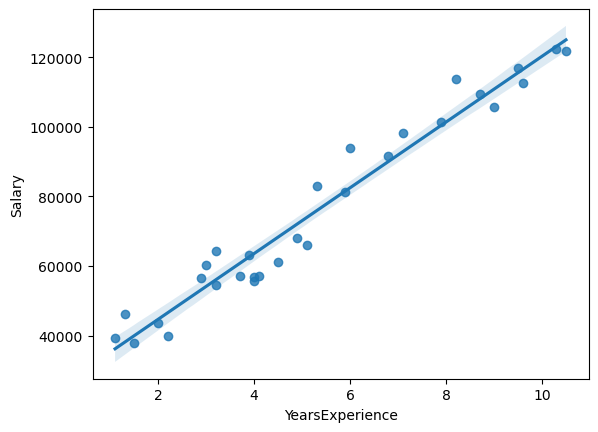

In [29]:
sns.regplot(x=salary_data['YearsExperience'],y=salary_data['Salary'])

In [30]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [31]:
model1=smf.ols("Salary~YearsExperience",data=salary_data).fit()

In [32]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 01 Mar 2024   Prob (F-statistic):           1.14e-20
Time:                        10:33:15   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
data_value=pd.array([1.3,1.5,2.2,4.0,6.0],dtype=np.float64)
data_pred=pd.DataFrame(data_value,columns=['YearsExperience'])

In [34]:
data_value.tolist()

[1.3, 1.5, 2.2, 4.0, 6.0]

In [35]:
model1.predict(data_pred)

0    38077.151217
1    39967.143681
2    46582.117306
3    63592.049484
4    82491.974127
dtype: float64

In [36]:
model1.mse_resid

33504591.131015327

In [37]:
np.sqrt(model1.mse_resid)

5788.315051119395